In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [4]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx"
cell_line_num = 2

def standardize_replicates(file_path, cell_line_num):
    df = pd.read_excel(file_path)

    # Subset the DataFrame to include only the plate readings
    plate_only_df = df.iloc[10:16, 2:12]

    if cell_line_num == 1:
        cell_line = plate_only_df.iloc[0:3, :]
    elif cell_line_num == 2:
        cell_line = plate_only_df.iloc[3:6, :]

    skax_file_name = df.iloc[0,0]
    print('skax_file_name', skax_file_name)

    # Find the median of each column in cell_line
    cell_line_med = cell_line.median()

    # Fetch the number of the last value in the cell_line_avg Series
    background = cell_line_med.iloc[-1]
    # print('Background median:', background)
    no_drug_response = cell_line_med.iloc[-2]
    # print('No drug response median:', no_drug_response)
    # print(cell_line)

    # Minus background from every column in cell_line
    cell_line = cell_line.sub(background)

    # print(cell_line)
    # Divide every column in cell_line by no_drug_response
    cell_line = cell_line.div(no_drug_response)*100


    # Remove the last two columns from cell_line dataframe
    cell_line = cell_line.iloc[:, :-2]

    return cell_line

In [14]:
# For plates where all wells contain cells. Last column of wells is the control, contains cells treated with vehicle only no drug
def standardize_replicates_all_cells(file_path, cell_line_num):
    df = pd.read_excel(file_path)

    # Subset the DataFrame to include only the plate readings
    plate_only_df = df.iloc[10:16, 2:12]

    if cell_line_num == 1:
        cell_line = plate_only_df.iloc[0:3, :]
    elif cell_line_num == 2:
        cell_line = plate_only_df.iloc[3:6, :]

    skax_file_name = df.iloc[0,0]
    print('skax_file_name', skax_file_name)

    # Find the median of each column in cell_line
    cell_line_med = cell_line.median()

    # print('Background median:', background)
    no_drug_response = cell_line_med.iloc[-1]
    # print('No drug response median:', no_drug_response)
    # print(cell_line)

    # print(cell_line)
    # Divide every column in cell_line by no_drug_response
    cell_line = cell_line.div(no_drug_response)*100


    # Remove the last two columns from cell_line dataframe
    cell_line = cell_line.iloc[:, :-1]

    return cell_line

In [5]:
# Example dose-response function (logistic function)
def dose_response(x, bottom, top, ic50, hill_slope):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill_slope)

In [6]:
# Fit dose-response
def fit_dose_response(concentrations, cell_line):
    doses = np.array(concentrations[:-1])

    # Find the median of each column in cell_line
    cell_line_med = cell_line.median()
    responses = np.array(cell_line_med[:])

    # Fit the model to the data
    popt, pcov = curve_fit(dose_response, doses, responses, bounds=([-20, -20, 0, 0], [150, 150, 200, 10]))

    # Extract the fitted parameters
    bottom, top, ic50, hill_slope = popt
    # print(f"IC50: {ic50}")

    # Generate doses for plotting the fit
    # Use a range that covers all data points
    doses_fit = np.logspace(np.log10(min(doses)), np.log10(max(doses)), 100)
    responses_fit = dose_response(doses_fit, *popt)

    # print(responses_fit)
    return ic50, doses_fit, responses_fit


In [33]:
def plot_dose_response(cell_line, concentrations, doses_fit, responses_fit, ic50, plot_title):
    doses = np.array(concentrations[:-1])
    # Plot the data and the fit
    plt.figure(figsize=(8, 6))
    plt.scatter(doses, cell_line.iloc[0, :], label='Data', color='#226E9C')
    plt.scatter(doses, cell_line.iloc[1, :], label='Data', color='#226E9C')
    plt.scatter(doses, cell_line.iloc[2, :], label='Data', color='#226E9C')
    plt.plot(doses_fit, responses_fit, label='Fit', color='#3C93C2')
    # Plot vertical line and text
    plt.axvline(x=ic50, color='#FC4E2A', linestyle='--', label=f'IC50: {ic50:.2f}')
    plt.text(ic50, -13, f'IC50: {ic50:.2f}', color='#FC4E2A', ha='center', va='top', fontsize=8)

    plt.xscale('log')
    plt.xlabel('Dose (uM)')
    plt.ylabel('Fluorescence Intensity (% of control)')
    #plt.legend()
    plt.title(plot_title)
    # Display the IC50 value on the plot

    plt.savefig('C:/GSC Project/drug_dose_response/figures/' + plot_title + '.png')
    plt.show()

skax_file_name 20240807_epa_G571_fluorescence_6hr.skax


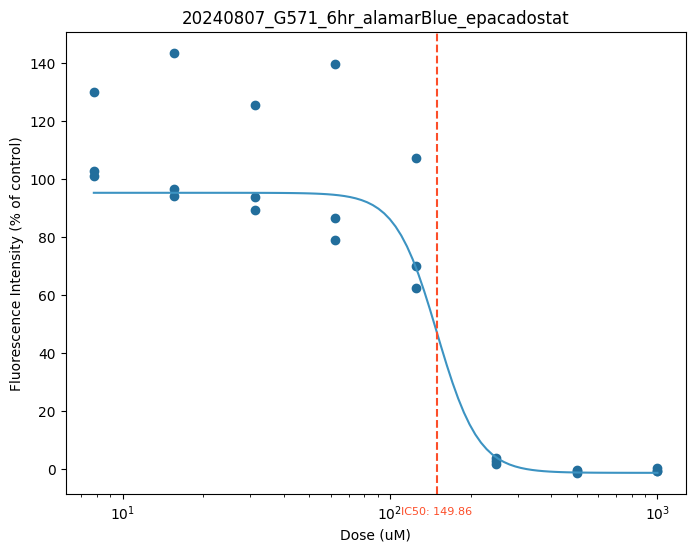

In [34]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx"
cell_line_num = 2
concentrations = [1000, 500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 0] # Epacadostat concentrations
plot_title = '20240807_G571_6hr_alamarBlue_epacadostat'

cell_line = standardize_replicates(file_path, cell_line_num)
ic50, doses_fit, responses_fit = fit_dose_response(concentrations, cell_line)

plot_dose_response(cell_line, concentrations, doses_fit, responses_fit, ic50, plot_title)

skax_file_name 20240812_epa_G523_G571_fluorescence_6hr.skax


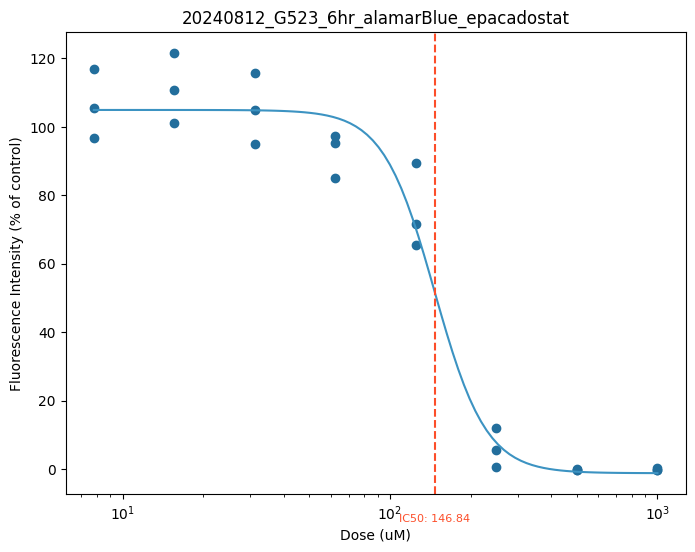

In [35]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Mon 12 2024 15-19-29-6182758.xlsx"
cell_line_num = 1
concentrations = [1000, 500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 0] # Epacadostat concentrations
plot_title = '20240812_G523_6hr_alamarBlue_epacadostat'

cell_line = standardize_replicates(file_path, cell_line_num)
ic50, doses_fit, responses_fit = fit_dose_response(concentrations, cell_line)

plot_dose_response(cell_line, concentrations, doses_fit, responses_fit, ic50, plot_title)

skax_file_name 20240812_epa_G523_G571_fluorescence_6hr.skax
skax_file_name 20240807_epa_G571_fluorescence_6hr.skax


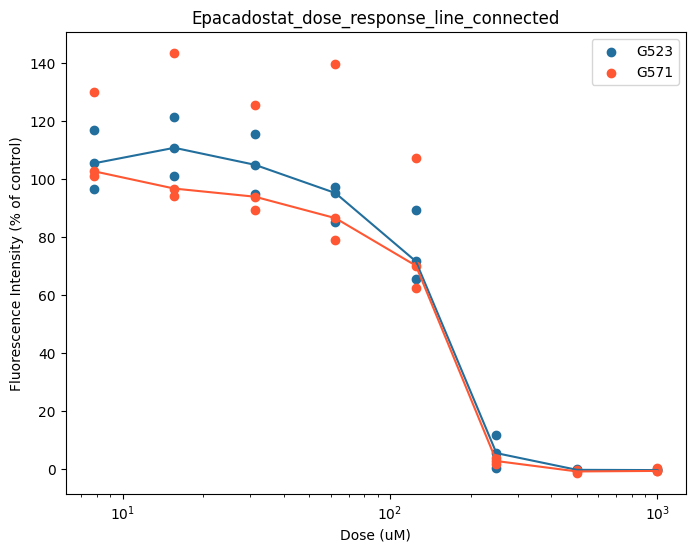

In [30]:
G571_Epa_file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx"
cell_line_num = 2
G523_Epa_file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Mon 12 2024 15-19-29-6182758.xlsx"
cell_line_num = 1
concentrations = [1000, 500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 0] # Epacadostat concentrations

cell_line_1 = standardize_replicates(G523_Epa_file_path, 1)
cell_line_2 = standardize_replicates(G571_Epa_file_path, 2)

doses = np.array(concentrations[:-1])
# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, cell_line_1.iloc[0, :], label='G523', color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[1, :], color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[2, :], color='#226E9C')
plt.scatter(doses, cell_line_2.iloc[0, :], label='G571', color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[1, :], color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[2, :], color='#FF5733')

plt.plot(doses, cell_line_1.median(), color='#226E9C')
plt.plot(doses, cell_line_2.median(), color='#FF5733')

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence Intensity (% of control)')
plt.legend()
plt.title('Epacadostat_dose_response_line_connected')
# Display the IC50 value on the plot

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + plot_title + '.png')
plt.show()

skax_file_name 20240807_D1MT_G523_G571_fluorescence_6hr.skax
skax_file_name 20240807_D1MT_G523_G571_fluorescence_6hr.skax


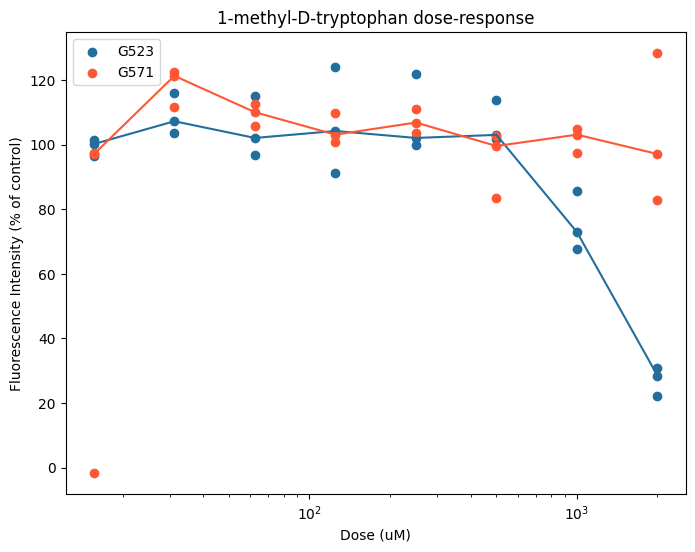

In [29]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-36-39-9798442.xlsx"
concentrations = [2000, 1000, 500, 250, 125, 62.5, 31.25, 15.625, 0]
plot_title = '20240807_D1MT_G523_fluorescence_6hr'

cell_line_1 = standardize_replicates(file_path, 1)
cell_line_2 = standardize_replicates(file_path, 2)

doses = np.array(concentrations[:-1])
# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, cell_line_1.iloc[0, :], label='G523', color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[1, :], color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[2, :], color='#226E9C')
plt.scatter(doses, cell_line_2.iloc[0, :], label='G571', color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[1, :], color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[2, :], color='#FF5733')

plt.plot(doses, cell_line_1.median(), color='#226E9C')
plt.plot(doses, cell_line_2.median(), color='#FF5733')

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence Intensity (% of control)')
plt.legend()
plt.title('1-methyl-D-tryptophan dose-response')
# Display the IC50 value on the plot

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + plot_title + '.png')
plt.show()



skax_file_name 20240913_G885_D_L_1MT.skax
skax_file_name 20240913_G549_D_L_1MT.skax


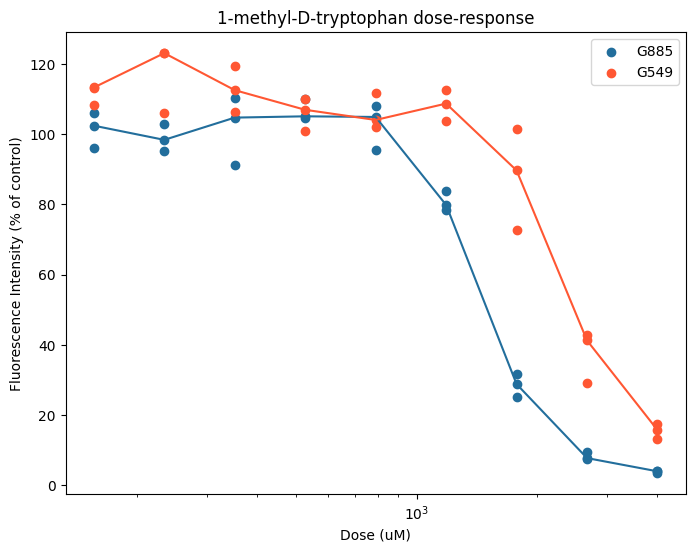

In [28]:
G885_D1MT_L1MT_file_path = "C:/GSC Project/drug_dose_response/raw_data/G885_D1MT_L1MT Sep Fri 13 2024 16-21-18-4043116.xlsx"
G885_Epa_LM10_file_path = "C:/GSC Project/drug_dose_response/raw_data/G885_Epa_LM10 Sep Fri 13 2024 16-20-37-1118984.xlsx"
G549_D1MT_L1MT_file_path = "C:/GSC Project/drug_dose_response/raw_data/G549_D1MT_L1MT Sep Fri 13 2024 16-20-58-2262552.xlsx"
G549_Epa_LM10_file_path = "C:/GSC Project/drug_dose_response/raw_data/G549_Epa_LM10 Sep Fri 13 2024 16-19-49-7221572.xlsx"

D1MT_L1MT_concentrations = [4000, 2666.67, 1777.78, 1185.19, 790.12, 526.75, 351.17, 234.11, 156.07, 0]
doses = np.array(D1MT_L1MT_concentrations[:-1])

cell_line_1 = standardize_replicates_all_cells(G885_D1MT_L1MT_file_path, 1)
cell_line_2 = standardize_replicates_all_cells(G549_D1MT_L1MT_file_path, 1)

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, cell_line_1.iloc[0, :], label='G885', color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[1, :], color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[2, :], color='#226E9C')
plt.scatter(doses, cell_line_2.iloc[0, :], label='G549', color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[1, :], color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[2, :], color='#FF5733')

plt.plot(doses, cell_line_1.median(), color='#226E9C')
plt.plot(doses, cell_line_2.median(), color='#FF5733')

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence Intensity (% of control)')
plt.legend()
plt.title('1-methyl-D-tryptophan dose-response')

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + '20240913_D1MT_G885_G549' + '.png')
plt.show()

skax_file_name 20240913_G885_D_L_1MT.skax
skax_file_name 20240913_G549_D_L_1MT.skax


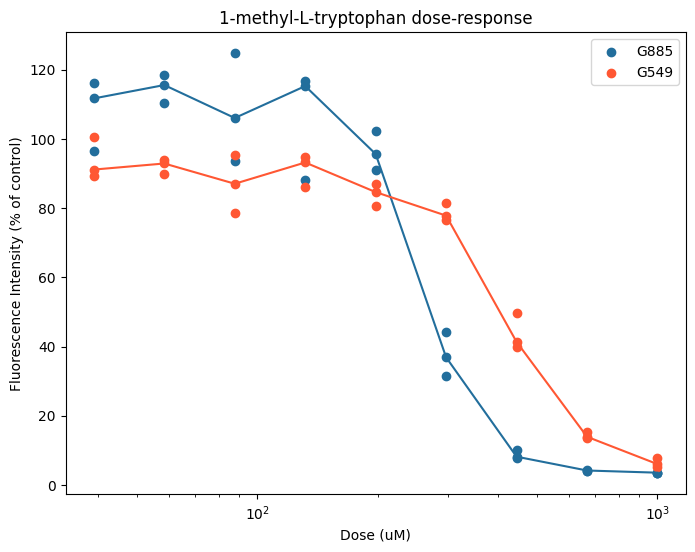

In [27]:
cell_line_1 = standardize_replicates_all_cells(G885_D1MT_L1MT_file_path, 2)
cell_line_2 = standardize_replicates_all_cells(G549_D1MT_L1MT_file_path, 2)

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, cell_line_1.iloc[0, :], label='G885', color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[1, :], color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[2, :], color='#226E9C')
plt.scatter(doses, cell_line_2.iloc[0, :], label='G549', color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[1, :], color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[2, :], color='#FF5733')

plt.plot(doses, cell_line_1.median(), color='#226E9C')
plt.plot(doses, cell_line_2.median(), color='#FF5733')

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence Intensity (% of control)')
plt.legend()
plt.title('1-methyl-L-tryptophan dose-response')

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + '20240913_L1MT_G885_G549' + '.png')
plt.show()

skax_file_name 20240913_G885_epa_lm10.skax
skax_file_name 20240913_G549_epa_lm10.skax


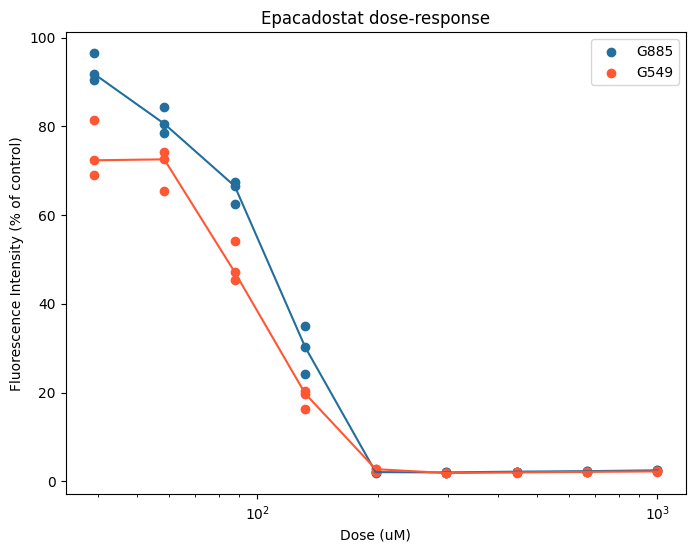

In [26]:
Epa_LM10_concentrations = [1000, 666.67, 444.44, 296.30, 197.53, 131.69, 87.79, 58.52, 39.01, 0]
doses = np.array(Epa_LM10_concentrations[:-1])

cell_line_1 = standardize_replicates_all_cells(G885_Epa_LM10_file_path, 1)
cell_line_2 = standardize_replicates_all_cells(G549_Epa_LM10_file_path, 1)

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, cell_line_1.iloc[0, :], label='G885', color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[1, :], color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[2, :], color='#226E9C')
plt.scatter(doses, cell_line_2.iloc[0, :], label='G549', color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[1, :], color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[2, :], color='#FF5733')

plt.plot(doses, cell_line_1.median(), color='#226E9C')
plt.plot(doses, cell_line_2.median(), color='#FF5733')

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence Intensity (% of control)')
plt.legend()
plt.title('Epacadostat dose-response')

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + '20240913_epa_G885_G549' + '.png')
plt.show()

skax_file_name 20240913_G885_epa_lm10.skax
skax_file_name 20240913_G549_epa_lm10.skax


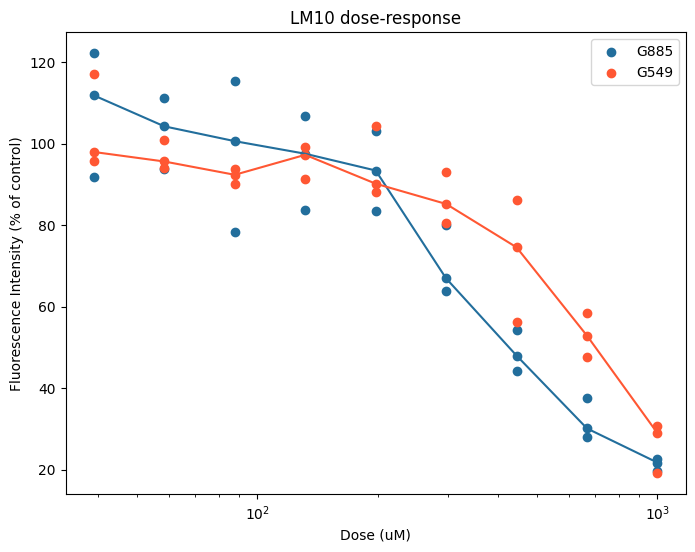

In [25]:
cell_line_1 = standardize_replicates_all_cells(G885_Epa_LM10_file_path, 2)
cell_line_2 = standardize_replicates_all_cells(G549_Epa_LM10_file_path, 2)

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, cell_line_1.iloc[0, :], label='G885', color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[1, :], color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[2, :], color='#226E9C')
plt.scatter(doses, cell_line_2.iloc[0, :], label='G549', color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[1, :], color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[2, :], color='#FF5733')

plt.plot(doses, cell_line_1.median(), color='#226E9C')
plt.plot(doses, cell_line_2.median(), color='#FF5733')

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence Intensity (% of control)')
plt.legend()
plt.title('LM10 dose-response')

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + '20240913_LM10_G885_G549' + '.png')
plt.show()